# Performing PCA and KMeans clustering on the Iris Dataset

In [1]:
#imports (run cell to import necessary libraries)

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

#scaling values
from sklearn.preprocessing import StandardScaler

#PCA 
from sklearn.decomposition import PCA 

#Kmeans 
from sklearn.cluster import KMeans

#for loading dataset
from sklearn.datasets import load_iris


#set seed for reproduciblity
np.random.seed(42)

plt.style.use('seaborn-white')

In [2]:
data = load_iris()


iris_columns = data['feature_names']
X = data['data']  # load the predictors
y = data['target'] # load the target

target_names = data['target_names'] # name of species

print(f'Species of Iris in this dataset are {target_names}')

Species of Iris in this dataset are ['setosa' 'versicolor' 'virginica']


In [3]:
# print the head of the dataset .

df = pd.DataFrame(X,
                  columns = iris_columns)
df['target'] = y  # store the target variable


#code here 
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
#code here 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


<AxesSubplot:xlabel='sepal length (cm)', ylabel='target'>

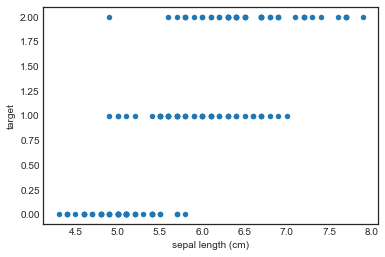

In [5]:
 
df.plot.scatter(x='sepal length (cm)',y = 'target')
#plot "sepal length (cm) VS target"

<AxesSubplot:xlabel='sepal width (cm)', ylabel='target'>

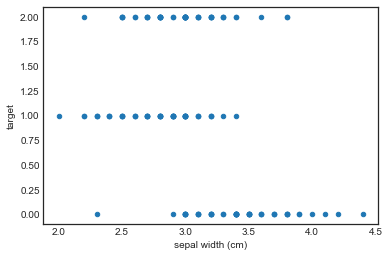

In [6]:
#code here
df.plot.scatter(x='sepal width (cm)',y = 'target')
#plot "sepal width (cm) VS target"

<AxesSubplot:xlabel='petal length (cm)', ylabel='target'>

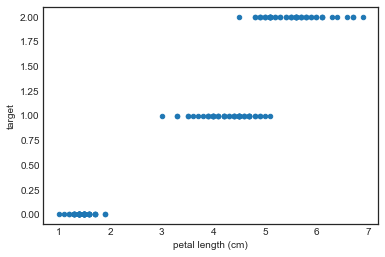

In [7]:
#code here 
df.plot.scatter(x='petal length (cm)',y = 'target')
#plot "petal length (cm) VS target"


<AxesSubplot:xlabel='petal width (cm)', ylabel='target'>

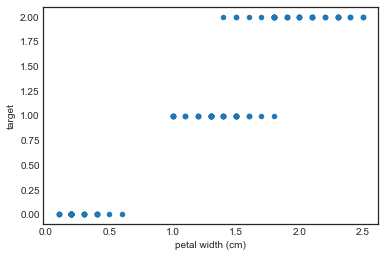

In [8]:
#code here 
df.plot.scatter(x='petal width (cm)',y = 'target')
#plot "petal width (cm) VS target"


In [9]:
#scale features of predictor dataset 
X_scaled =  StandardScaler().fit_transform(X)
#code here 


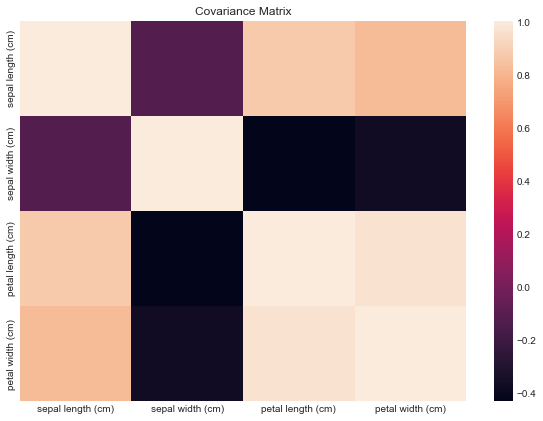

In [10]:
fig = plt.figure(figsize=(10,7))

cov = pd.DataFrame(X_scaled,
                   columns = iris_columns).cov() # get covariance matrix

plt.title('Covariance Matrix')
sns.heatmap(cov)  # plot heatmap
plt.show()

In [11]:
#petal width(cm) and petal length(cm) have highest covariance

In [12]:
#code here 
pca = PCA(n_components = 2)

#code here 
#fit on scaled data 


#get the principal components
X_pca = pd.DataFrame(pca.fit_transform(X_scaled))

X_pca

,0,1
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835
...,...,...
145,1.870503,0.386966
146,1.564580,-0.896687
147,1.521170,0.269069
148,1.372788,1.011254


In [13]:
#check shape of X_pca
X_pca.shape
#code here 


(150, 2)

<AxesSubplot:xlabel='0', ylabel='1'>

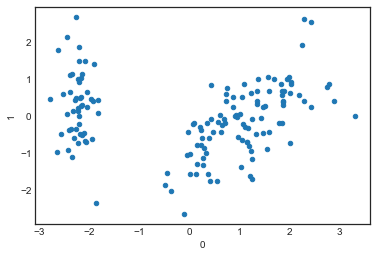

In [14]:
#code here 

X_pca.plot.scatter(x = 0, y = 1)

In [15]:
#code here 
kmeans = KMeans(n_clusters = 3)

#code here 

#fit kmeans on X_pca
kmeans.fit_transform(X_pca)
#predict 
clusters = kmeans.predict(X_pca)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

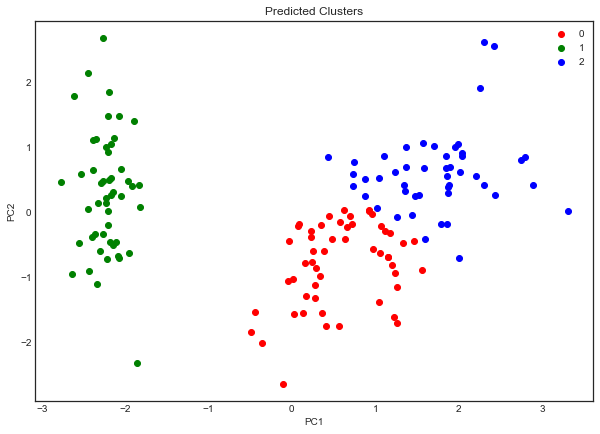

In [16]:
color_list = ['r','g','b']

#color mapped to each cluster
color_dict = {i:color_list[i] for i in range(3)}

fig = plt.figure(figsize=(10,7))
plt.title('Predicted Clusters')

# plot a unique color for each cluster
for cluster in np.unique(clusters):
  X_cls = X_pca[np.where(clusters==cluster,True,False)] #select the cluster points
  
  cluster_colr =color_dict[cluster]  # get a unique color for each cluster

  #X_cls.plot.scatter(x=0, y=1, label = cluster ,color = cluster_colr )
  plt.scatter(X_cls.iloc[:,0],X_cls.iloc[:,1],label = cluster ,color = cluster_colr) #use iloc

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


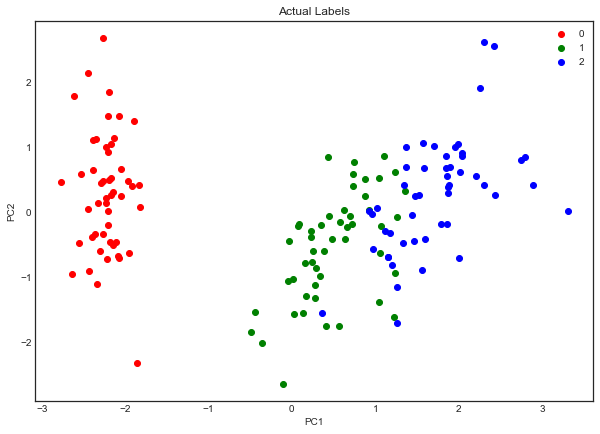

In [17]:
fig = plt.figure(figsize=(10,7))
plt.title('Actual Labels')

# plot a unique color for each cluster
for label in np.unique(y):
  X_lab = X_pca[np.where(y==label,True,False)] #select the points with label
  
  label_colr = color_dict[label]  # get a unique color for each label

  plt.scatter(X_lab.iloc[:,0],X_lab.iloc[:,1],label = label ,color = label_colr) #use iloc

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()